# Task 2: Sentiment and Thematic Analysis

In [1]:
import sys
import os
import pandas as pd
from glob import glob

In [2]:
from pathlib import Path
from importlib import reload
# add the project root to the path
project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

## Sentiment Analysis

### importing datasets

In [3]:
# import the module
# In this task, we will load the cleaned the dataset for further analysis.
# First, we will load the module for data loading
from src.data_loader import DataLoader
import src.data_loader
reload(src.data_loader)

<module 'src.data_loader' from 'D:\\Research & Project\\10academy\\week 2\\challenge\\CX-analytics-for-fintech-apps\\src\\data_loader.py'>

In [4]:
data_path='../data/processed/'
# Load the dataset
data_loader = DataLoader(data_path)
data = data_loader.load_data('combined_preprocessed.csv')

In [5]:
### Display the first few rows of the dataset
print("First few rows of the dataset:")
data

First few rows of the dataset:


,review_text,rating,date,bank_name,source
0,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,BOA,Google Play
1,this is worest app 24/7 loading,1,2025-06-01,BOA,Google Play
2,This App is not interest for Android phone Ple...,1,2025-06-01,BOA,Google Play
3,BoA system is confartable,5,2025-06-01,BOA,Google Play
4,very nice Abyssinia bank is choice all,5,2025-05-31,BOA,Google Play
...,...,...,...,...,...
1425,App That makes Difference!,5,2025-01-14,Dashen,Google Play
1426,"Waw Great and innovated,user friendly, always ...",5,2025-01-13,Dashen,Google Play
1427,It's Best waww 🙏,5,2025-01-13,Dashen,Google Play
1428,Always one step ahead,5,2025-01-13,Dashen,Google Play


### preprocessing for sentiment analysis

In [6]:
# import the module
from src.sentiment_analysis.preprocessing import Preprocessor
import src.sentiment_analysis.preprocessing
# Reload the module to ensure we have the latest version
reload(src.sentiment_analysis.preprocessing)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chall\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chall\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chall\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\chall\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chall\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chall\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C

<module 'src.sentiment_analysis.preprocessing' from 'D:\\Research & Project\\10academy\\week 2\\challenge\\CX-analytics-for-fintech-apps\\src\\sentiment_analysis\\preprocessing.py'>

In [7]:
# preprocess the data
preprocessor = Preprocessor()
data = preprocessor.preprocess_dataframe(data,'review_text')

In [8]:
data.head()

,review_text,rating,date,bank_name,source,processed_review
0,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,BOA,Google Play,hello facing problem boa mobile app every time...
1,this is worest app 24/7 loading,1,2025-06-01,BOA,Google Play,worest app loading
2,This App is not interest for Android phone Ple...,1,2025-06-01,BOA,Google Play,app interest android phone please update
3,BoA system is confartable,5,2025-06-01,BOA,Google Play,boa system confartable
4,very nice Abyssinia bank is choice all,5,2025-05-31,BOA,Google Play,nice abyssinia bank choice


### performing sentiment analysis

In [9]:
# load the sentiment analysis model
from src.sentiment_analysis.sentiment_analysis import SentimentAnalyzer
import src.sentiment_analysis.sentiment_analysis
# Reload the module to ensure we have the latest version
reload(src.sentiment_analysis.sentiment_analysis)

d:\Research & Project\10academy\week 2\challenge\CX-analytics-for-fintech-apps\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'src.sentiment_analysis.sentiment_analysis' from 'D:\\Research & Project\\10academy\\week 2\\challenge\\CX-analytics-for-fintech-apps\\src\\sentiment_analysis\\sentiment_analysis.py'>

In [10]:
# initialize the sentiment analyzer
sentiment_analyzer = SentimentAnalyzer()
# Run sentiment analysis
results = sentiment_analyzer.analyze(data["processed_review"].tolist())


Device set to use cpu


In [11]:
# convert the sentiment scores to signed scores
def convert_to_signed_score(result):
    return result['score'] if result['label'] == 'POSITIVE' else -result['score']

In [12]:
# Add the results to the dataframe
data['sentiment'] = [r["label"] for r in results]
data['sentiment_score'] = [convert_to_signed_score(r) for r in results]

In [13]:
data.head()

,review_text,rating,date,bank_name,source,processed_review,sentiment,sentiment_score
0,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,BOA,Google Play,hello facing problem boa mobile app every time...,NEGATIVE,-0.998130
1,this is worest app 24/7 loading,1,2025-06-01,BOA,Google Play,worest app loading,NEGATIVE,-0.991218
2,This App is not interest for Android phone Ple...,1,2025-06-01,BOA,Google Play,app interest android phone please update,POSITIVE,0.808064
3,BoA system is confartable,5,2025-06-01,BOA,Google Play,boa system confartable,NEGATIVE,-0.998823
4,very nice Abyssinia bank is choice all,5,2025-05-31,BOA,Google Play,nice abyssinia bank choice,POSITIVE,0.999412


### Aggregate by bank and rating

In [14]:
# Ensure correct data types
data['rating'] = data['rating'].astype(int)

# Group by bank and rating, and calculate the average sentiment score
agg_data = data.groupby(['bank_name', 'rating'])['sentiment_score'].mean().reset_index()
agg_data = agg_data.rename(columns={'sentiment_score': 'mean_sentiment_score'})

# print the aggregated data
print("Aggregated data by bank and rating:")
print(agg_data)

Aggregated data by bank and rating:
   bank_name  rating  mean_sentiment_score
0        BOA       1             -0.648365
1        BOA       2             -0.623546
2        BOA       3             -0.235086
3        BOA       4              0.238008
4        BOA       5              0.572831
5        CBE       1             -0.579489
6        CBE       2             -0.695084
7        CBE       3             -0.505532
8        CBE       4              0.134200
9        CBE       5              0.722065
10    Dashen       1             -0.337573
11    Dashen       2             -0.478598
12    Dashen       3             -0.350008
13    Dashen       4              0.165530
14    Dashen       5              0.753900


### visualize the trends

In [15]:
# import module for visualization
from src.sentiment_analysis.visualization import SentimentVisualizer
import src.sentiment_analysis.visualization
# Reload the module to ensure we have the latest version
reload(src.sentiment_analysis.visualization)

<module 'src.sentiment_analysis.visualization' from 'D:\\Research & Project\\10academy\\week 2\\challenge\\CX-analytics-for-fintech-apps\\src\\sentiment_analysis\\visualization.py'>

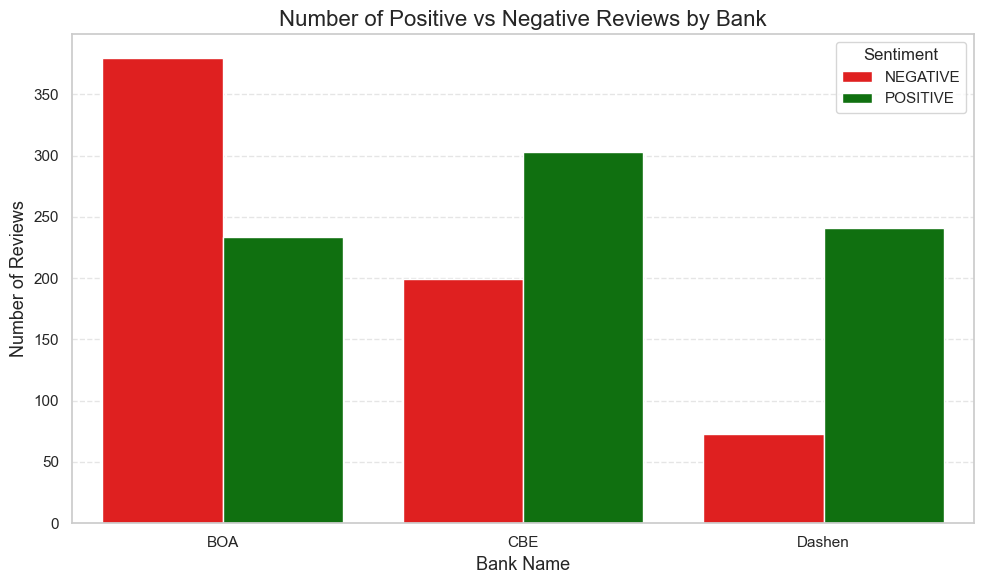

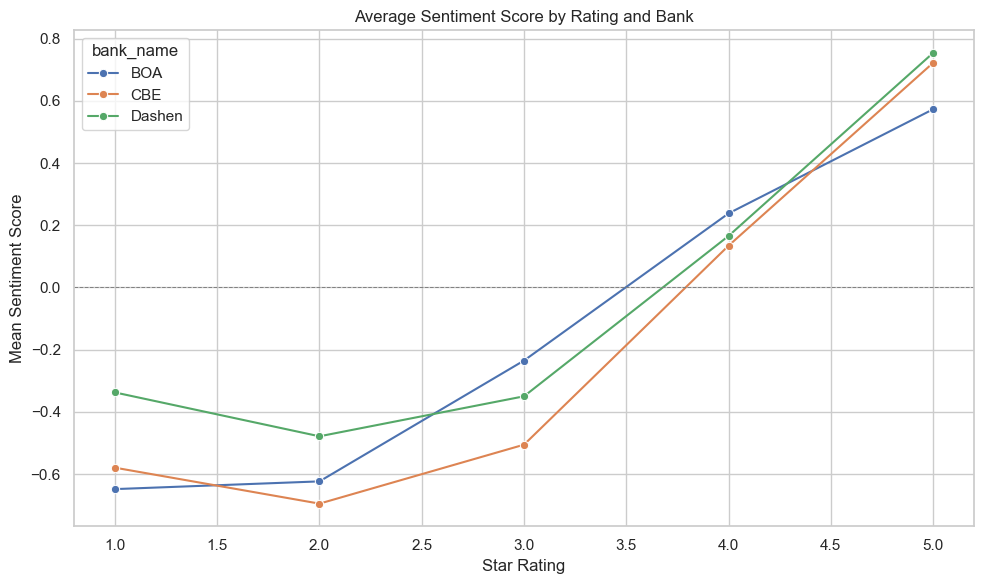

In [16]:
# initialize the visualizer
visualizer = SentimentVisualizer()

visualizer.plot_sentiment_distribution(data)


# Visualize the sentiment scores
visualizer.plot_mean_sentiment_trends(agg_data)

## Thematic Analysis

In [17]:
# loading the modules for thematic analysis
from src.thematic_analysis.thematic_analysis import ThematicAnalyzer
import src.thematic_analysis.thematic_analysis
# Reload the module to ensure we have the latest version
reload(src.thematic_analysis.thematic_analysis)

<module 'src.thematic_analysis.thematic_analysis' from 'D:\\Research & Project\\10academy\\week 2\\challenge\\CX-analytics-for-fintech-apps\\src\\thematic_analysis\\thematic_analysis.py'>

### Keyword extraction

In [18]:
# initialize the thematic analyzer
thematic_analyzer = ThematicAnalyzer()

In [19]:
# extract top themes from the reviews per bank
bank_themes = thematic_analyzer.analyze_per_bank(data)
# Display top themes per bank
for bank, themes in bank_themes.items():
    print(f"\nTop themes for {bank}:")
    for theme, count in themes.items():
        print(f"  {theme}: {count}")



Top themes for BOA:
  other: 46
  login_issues: 1
  customer_support: 1
  performance: 1
  transactions: 1

Top themes for CBE:
  other: 46
  transactions: 2
  login_issues: 1
  customer_support: 1

Top themes for Dashen:
  other: 45
  transactions: 2
  ui_ux: 1
  customer_support: 1
  performance: 1


In [20]:
# Filter positive and negative reviews
positive_reviews = data[data['sentiment'] == 'POSITIVE']
negative_reviews = data[data['sentiment'] == 'NEGATIVE']

# top 20 keywords in positive reviews
positive_keywords = thematic_analyzer.extract_keywords(positive_reviews['processed_review'].tolist())
print("\nTop 20 keywords in positive reviews:")
print(positive_keywords)

# top 20 keywords in negative reviews
negative_keywords = thematic_analyzer.extract_keywords(negative_reviews['processed_review'].tolist())
print("\nTop 20 keywords in negative reviews:")
print(negative_keywords)
        


Top 20 keywords in positive reviews:
['account' 'ahead' 'amazing' 'app' 'application' 'apps' 'bank' 'banking'
 'best' 'boa' 'cbe' 'convenient' 'dashen' 'digital' 'easy' 'ethiopia'
 'experience' 'fast' 'feature' 'friendly' 'good' 'great' 'like' 'love'
 'make' 'mobile' 'money' 'need' 'new' 'nice' 'payment' 'really' 'reliable'
 'secure' 'service' 'simple' 'smooth' 'step' 'super' 'thank' 'thanks'
 'time' 'transaction' 'transfer' 'update' 'use' 'user' 'work' 'working'
 'wow']

Top 20 keywords in negative reviews:
['access' 'account' 'app' 'application' 'apps' 'bad' 'bank' 'banking'
 'better' 'boa' 'bug' 'ca' 'cbe' 'crash' 'crashing' 'customer' 'day'
 'developer' 'error' 'experience' 'fix' 'good' 'issue' 'like' 'make'
 'mobile' 'money' 'need' 'new' 'open' 'option' 'otp' 'phone' 'problem'
 'say' 'screenshot' 'service' 'slow' 'time' 'transaction' 'transfer' 'try'
 'update' 'use' 'used' 'using' 'version' 'work' 'working' 'worst']


In [21]:
# if there are same keywords in both positive and negative reviews, we will remove them
common_keywords = set(positive_keywords) & set(negative_keywords)
if common_keywords:
    print("\nCommon keywords in both positive and negative reviews:")
    print(common_keywords)
# Remove common keywords from both lists
positive_keywords = [kw for kw in positive_keywords if kw not in common_keywords]
negative_keywords = [kw for kw in negative_keywords if kw not in common_keywords]
# Display the final keywords
print("\nFinal keywords in positive reviews:")
print(positive_keywords)
print("\nFinal keywords in negative reviews:")
print(negative_keywords)


Common keywords in both positive and negative reviews:
{'boa', 'application', 'use', 'banking', 'update', 'work', 'time', 'good', 'app', 'make', 'like', 'cbe', 'mobile', 'working', 'bank', 'need', 'transaction', 'experience', 'money', 'new', 'service', 'account', 'apps', 'transfer'}

Final keywords in positive reviews:
['ahead', 'amazing', 'best', 'convenient', 'dashen', 'digital', 'easy', 'ethiopia', 'fast', 'feature', 'friendly', 'great', 'love', 'nice', 'payment', 'really', 'reliable', 'secure', 'simple', 'smooth', 'step', 'super', 'thank', 'thanks', 'user', 'wow']

Final keywords in negative reviews:
['access', 'bad', 'better', 'bug', 'ca', 'crash', 'crashing', 'customer', 'day', 'developer', 'error', 'fix', 'issue', 'open', 'option', 'otp', 'phone', 'problem', 'say', 'screenshot', 'slow', 'try', 'used', 'using', 'version', 'worst']


In [22]:
# extract top keywords from the reviews per bank
bank_keywords = thematic_analyzer.extract_bank_keywords(data)
# Display top keywords per bank
for bank, keywords in bank_keywords.items():
    print(f"\nTop keywords for {bank}:")
    for keyword in keywords:
        print(f"  {keyword}")


Top keywords for BOA:
  account
  app
  application
  apps
  bad
  bank
  banking
  best
  better
  boa
  bug
  ca
  cbe
  crash
  day
  developer
  easy
  error
  experience
  fix
  good
  great
  issue
  like
  login
  make
  mobile
  money
  need
  new
  open
  option
  otp
  phone
  problem
  properly
  say
  service
  slow
  time
  transaction
  transfer
  try
  update
  use
  using
  version
  work
  working
  worst

Top keywords for CBE:
  access
  account
  app
  application
  apps
  bank
  banking
  best
  better
  bug
  ca
  cbe
  crash
  crashing
  developer
  easy
  ethiopia
  fast
  feature
  fix
  good
  great
  issue
  like
  make
  mobile
  money
  need
  new
  nice
  option
  payment
  problem
  say
  screenshot
  security
  service
  simple
  thank
  thanks
  time
  transaction
  transfer
  update
  use
  used
  useful
  using
  work
  working

Top keywords for Dashen:
  account
  ahead
  amazing
  app
  application
  bank
  banking
  best
  chat
  convenient
  custo

In [24]:
# Save results as CSV (e.g., review_id, review_text, sentiment_label, sentiment_score, identified_theme(s))
data["themes"] = data["processed_review"].apply(thematic_analyzer.categorize_themes)
data["review_id"] = range(1, len(data) + 1)
output_df= data[['review_id', 'review_text', 'sentiment', 'sentiment_score', 'themes']].copy()
output_df.to_csv('../data/analyzed/thematic_analysis_results.csv', index=False)

In [25]:
# Filter positive and negative reviews per bank
positive_reviews_per_bank = data[data['sentiment'] == 'POSITIVE']
negative_reviews_per_bank = data[data['sentiment'] == 'NEGATIVE']
# top keywords in positive reviews per bank
positive_keywords_per_bank = thematic_analyzer.extract_bank_keywords(positive_reviews_per_bank)
# Display top keywords in positive reviews per bank
for bank, keywords in positive_keywords_per_bank.items():
    print(f"\nTop keywords in positive reviews for {bank}:")
    print(keywords)
# top keywords in negative reviews per bank
negative_keywords_per_bank = thematic_analyzer.extract_bank_keywords(negative_reviews_per_bank)
# Display top keywords in negative reviews per bank
for bank, keywords in negative_keywords_per_bank.items():
    print(f"\nTop keywords in negative reviews for {bank}:")
    print(keywords)


Top keywords in positive reviews for BOA:
['abyssinia' 'amazing' 'app' 'application' 'apps' 'awesome' 'bank'
 'banking' 'best' 'better' 'boa' 'ca' 'cbe' 'customer' 'day' 'developer'
 'easy' 'ethiopia' 'fast' 'feature' 'functional' 'good' 'great' 'improve'
 'like' 'make' 'mobile' 'money' 'need' 'new' 'nice' 'open' 'option'
 'previous' 'properly' 'really' 'service' 'thanks' 'time' 'transaction'
 'transfer' 'update' 'updated' 'use' 'user' 'using' 'version' 'work'
 'working' 'wow']

Top keywords in positive reviews for CBE:
['account' 'amazing' 'app' 'application' 'apps' 'bank' 'banking' 'best'
 'ca' 'cbe' 'easy' 'ethiopia' 'excellent' 'fantastic' 'fast' 'feature'
 'fix' 'friendly' 'good' 'great' 'happy' 'interesting' 'life' 'like'
 'love' 'make' 'mobile' 'money' 'new' 'nice' 'payment' 'reliable' 'save'
 'screenshot' 'secure' 'service' 'simple' 'thank' 'thanks' 'time'
 'transaction' 'transfer' 'update' 'use' 'useful' 'user' 'using' 'work'
 'working' 'wow']

Top keywords in positive review

In [26]:
# remove the common keywords from both positive and negative reviews per bank
for bank in bank_keywords.keys():
    bank_common_keywords = set(positive_keywords_per_bank.get(bank, [])) & set(negative_keywords_per_bank.get(bank, []))
    positive_keywords_per_bank[bank] = [kw for kw in positive_keywords_per_bank[bank] if kw not in bank_common_keywords]
    negative_keywords_per_bank[bank] = [kw for kw in negative_keywords_per_bank[bank] if kw not in bank_common_keywords]

In [27]:
# display the final keywords per bank
for bank in bank_keywords.keys():
    print(f"\nFinal keywords for {bank}:")
    print("Positive:", positive_keywords_per_bank.get(bank, []))
    print("Negative:", negative_keywords_per_bank.get(bank, []))


Final keywords for BOA:
Positive: ['abyssinia', 'amazing', 'awesome', 'best', 'cbe', 'easy', 'ethiopia', 'fast', 'feature', 'functional', 'great', 'improve', 'new', 'nice', 'previous', 'really', 'thanks', 'updated', 'user', 'wow']
Negative: ['account', 'bad', 'bug', 'crash', 'error', 'experience', 'fix', 'issue', 'know', 'login', 'otp', 'phone', 'poor', 'problem', 'say', 'seen', 'slow', 'try', 'used', 'worst']

Final keywords for CBE:
Positive: ['amazing', 'apps', 'best', 'easy', 'excellent', 'fantastic', 'fast', 'friendly', 'great', 'happy', 'interesting', 'life', 'love', 'nice', 'payment', 'reliable', 'save', 'secure', 'simple', 'thank', 'thanks', 'useful', 'user', 'wow']
Negative: ['access', 'annoying', 'bad', 'better', 'bug', 'crash', 'crashing', 'developer', 'issue', 'look', 'mode', 'need', 'network', 'open', 'option', 'problem', 'reason', 'say', 'security', 'send', 'thing', 'turn', 'used', 'worst']

Final keywords for Dashen:
Positive: ['ahead', 'amazing', 'best', 'convenient', 

In [28]:
# Word cloud for positive reviews
# load module for word cloud visualization
from src.thematic_analysis.visualization import ThematicVisualizer
import src.thematic_analysis.visualization  
# Reload the module to ensure we have the latest version
reload(src.thematic_analysis.visualization)

<module 'src.thematic_analysis.visualization' from 'D:\\Research & Project\\10academy\\week 2\\challenge\\CX-analytics-for-fintech-apps\\src\\thematic_analysis\\visualization.py'>


Word cloud for BOA:


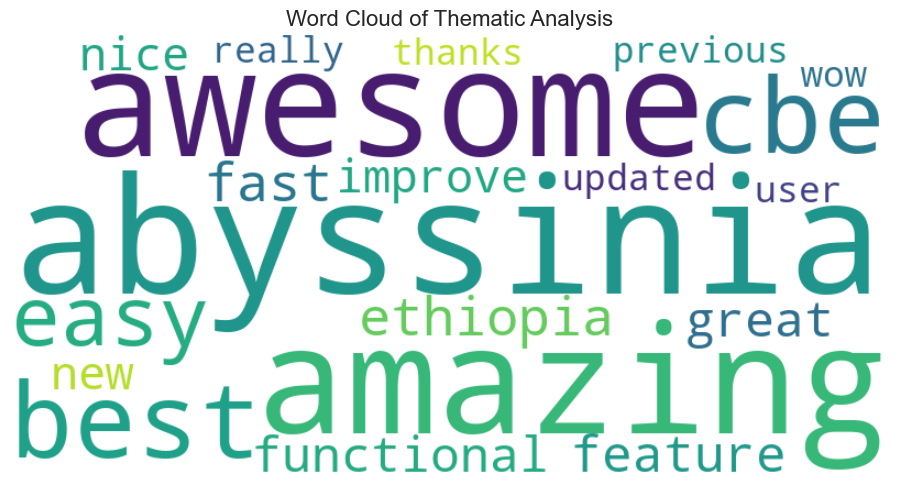

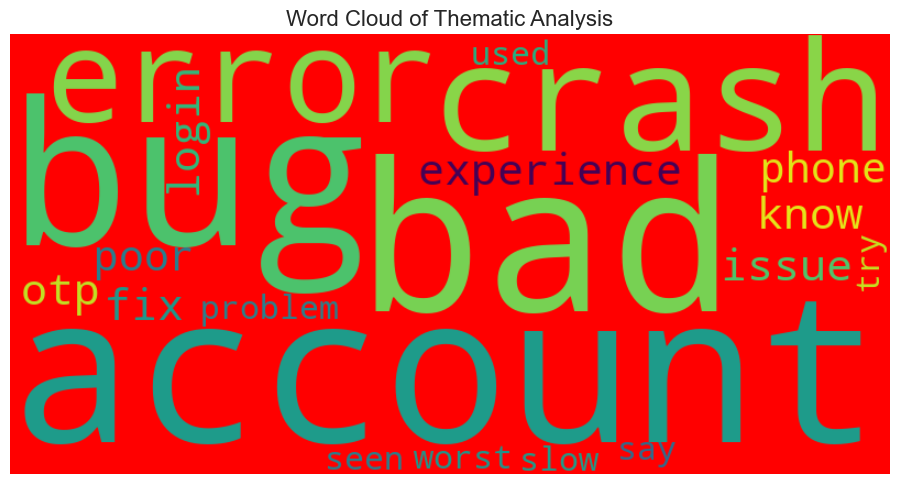


Word cloud for CBE:


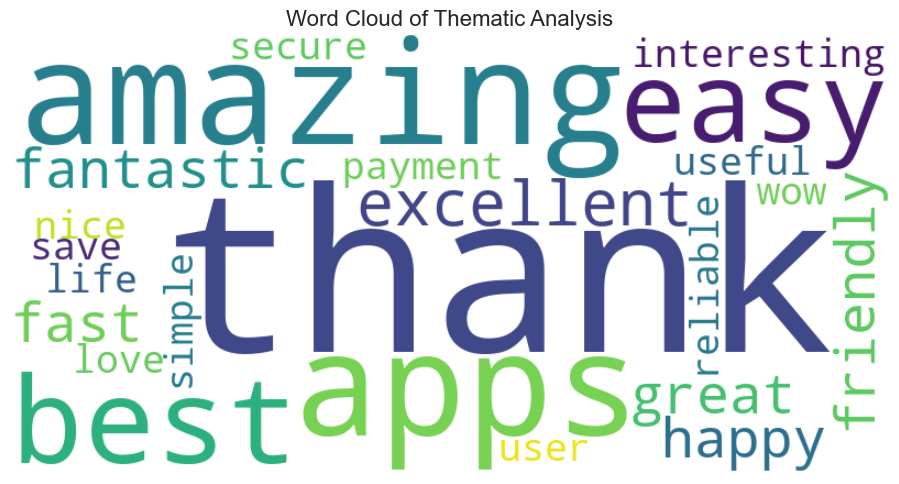

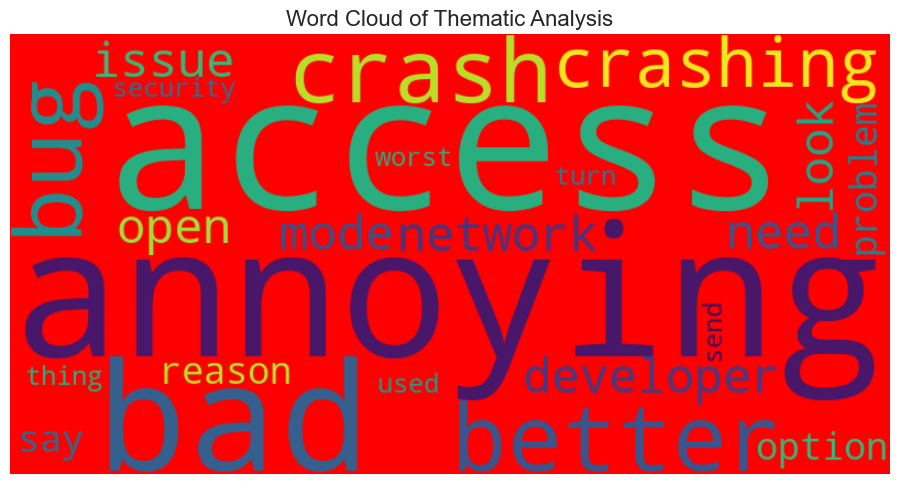


Word cloud for Dashen:


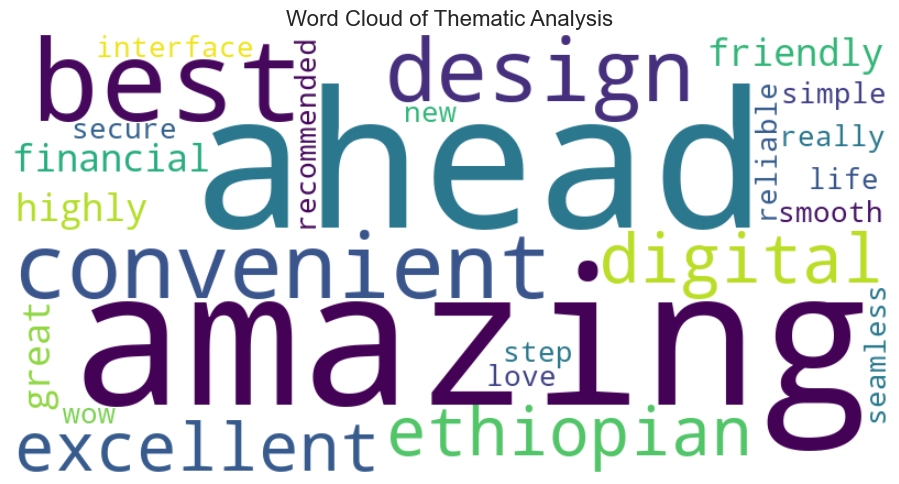

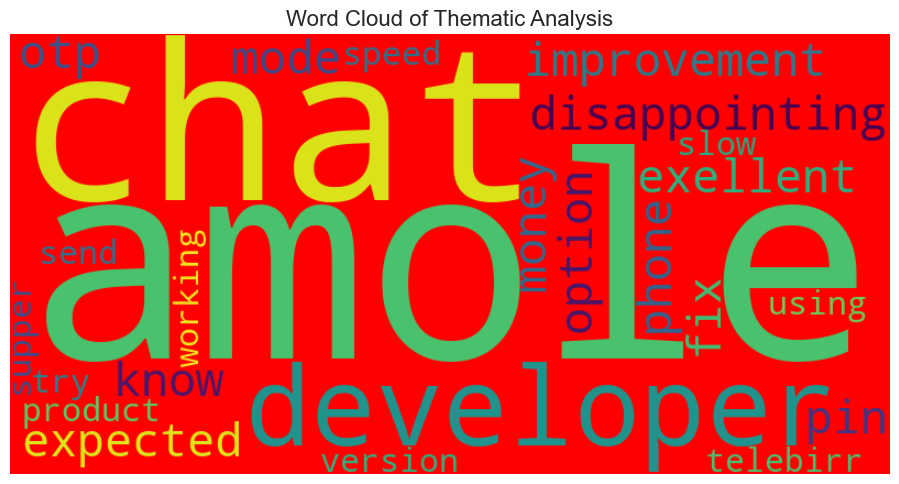

In [29]:
# initialize the thematic visualizer
thematic_visualizer = ThematicVisualizer()
# Generate word cloud for each bank
for bank in bank_keywords.keys():
    print(f"\nWord cloud for {bank}:")
    # Plot word cloud for positive and negative keywords
    thematic_visualizer.plot_wordcloud(" ".join(positive_keywords_per_bank.get(bank, [])),color='white')
    thematic_visualizer.plot_wordcloud(" ".join(negative_keywords_per_bank.get(bank, [])),color='red')